---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [7]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [8]:
def answer_one():
#     frauds_df = pd.read_csv("./../Datasets/fraud_data.csv")
    frauds_df = pd.read_csv('fraud_data.csv')
    # Your code here
    frauds_count = frauds_df["Class"].value_counts()
    fraud_per = frauds_count[1]/(frauds_count[1]+frauds_count[0])
    return fraud_per


In [10]:
answer_one()

0.016410823768035772


0.016410823768035772

In [11]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')
# df = pd.read_csv('./../Datasets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [12]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    dummy_accuracy = dummy_majority.score(X_test, y_test)
    dummy_recall = recall_score(y_test, dummy_majority.predict(X_test))
    # Your code here
    
    return (dummy_accuracy, dummy_recall)

In [14]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [15]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    svc_model = SVC().fit(X_train, y_train)
    svc_predition = svc_model.predict(X_test)
    # Your code here
    
    return (svc_model.score(X_test, y_test), recall_score(y_test, svc_predition), precision_score(y_test, svc_predition))

In [16]:
answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [29]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svc_model = SVC(C= 1e9, gamma= 1e-07).fit(X_train, y_train)
    svc_predict_decision_func = svc_model.decision_function(X_test)
    predicted_with_threshold = (svc_predict_decision_func > -220).astype(int)
    
    return confusion_matrix(y_test, predicted_with_threshold)

In [30]:
answer_four()

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [77]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    
    
    logistic_model = LogisticRegression().fit(X_train, y_train)
    
    #decision function and predicted proba scores
#     logistic_proba_score = logistic_model.predict_proba(X_test)
    logistic_decision_score = logistic_model.decision_function(X_test)
#     print(logistic_proba_score[:,0])
#     print(logistic_decision_score)
    # precision-curve and #roc curve
    precision, recall, thresholds_prc = precision_recall_curve(y_test,logistic_decision_score)
    false_positive_rate, true_positive_rate, thresholds_roc = roc_curve(y_test, logistic_decision_score)
    
    

    # fpr[np.abs(fpr-0.16).argmin()])].max() = coz no value fits to exact 0.16
    
    return (recall[np.where(precision == 0.75)][0], true_positive_rate[np.where(false_positive_rate == false_positive_rate[np.abs(false_positive_rate-0.16).argmin()])].max())
#     return (precision, recall, true_positive_rate, false_positive_rate)

In [78]:
answer_five()

(0.825, 0.95)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [121]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()
    
    grid_values = {'C':[0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    grid_src_clf = GridSearchCV(clf, param_grid = grid_values, cv=3, scoring="recall")
    grid_src_clf.fit(X_train, y_train)

    # Your code here
    results = grid_src_clf.cv_results_
    mean_scores = results["mean_test_score"]
    mean_scores = mean_scores.reshape(5,2)
    return mean_scores

In [122]:
scores = answer_six()

<IPython.core.display.Javascript object>


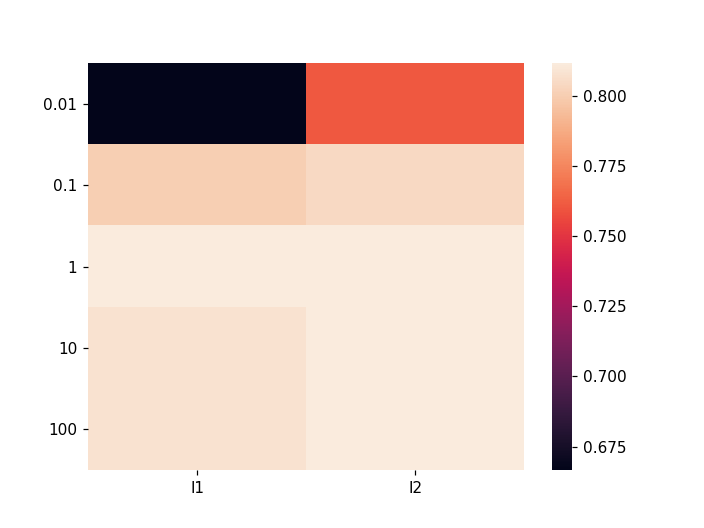

In [123]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

# GridSearch_Heatmap(answer_six())